# <span style="color:#ADFF2F">  Решение тестового задания на должность Data-аналитик в ЦО:</span>

`Зеленина Екатерина`
Контакты: [Telegram](https://t.me/zelenina.kate), ekzelenina98@mail.ru, +79129727900

[Задача 1](#1)

[Задача 2](#2)

[Задача 3](#3)

[Задача 4](#4)


<a id='1'></a>
## Задача 1
### Провести мониторинг позиций, подготовить индекс цен по конкурентам, предложить изменение наценок с учётом того, что стратегия встать в минимальную цену на рынке.
### На основе статистики скидок и количества продаж по данным позициям, дать предложение по размеру скидки, чтобы увеличить продажи в 2 раза.

In [26]:
import pandas as pd
import numpy as np
import pylab as pl
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [27]:
df_t11 = pd.read_excel('/Users/andrey/Desktop/Kate/jup/notebook_project/GA_Zelenina_test/task_1.1.xlsx')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
df_t11.head(3)

,Бренд,Код товара,Наименование товара,Цена закупки товара,Цена Золотое яблоко 24.03,без скидки Золотое яблоко 24.03,Скидка Золотое яблоко,Цена Летуаль 24.03,без скидки Летуаль 24.03,Летуаль ЗЯ,Цена РивГош 24.04,без скидки РивГош 24.03,РивГош ЗЯ,Цена Озон 24.05,без скидки Озон 24.03,Озон ЗЯ,Цена Вайлдберрис 24.06,без скидки Вайлдберрис 24.03,Скидка Вайлдберрис
0,Vivienne Sabo,3226300004,Vivienne Sabo Карандаш д/бровей РегаCrayon Sou...,180.53,329,498,0.34,329,329,1.82,329,495,1.00,328,497,1.00,328,498,1.00
1,Shiseido,15111300017,SHISEIDO Future Solution LX Сыворотка д/здоров...,14919.36,21775,43550,0.50,50699,50699,3.40,24999,50700,1.15,11668,21005,0.54,27014,89990,1.24
2,Shiseido,15111300006,SHISEIDO Крем для тела восстанавливающий FUTUR...,6197.27,15795,21060,0.25,10875,14500,1.75,9999,26450,0.63,22602,31692,1.43,13672,64100,0.87


In [28]:
df_t11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Бренд                            10 non-null     object 
 1   Код товара                       10 non-null     int64  
 2   Наименование товара              10 non-null     object 
 3   Цена закупки товара              10 non-null     float64
 4   Цена Золотое яблоко 24.03        10 non-null     int64  
 5   без скидки Золотое яблоко 24.03  10 non-null     int64  
 6   Скидка Золотое яблоко            10 non-null     float64
 7   Цена Летуаль 24.03               10 non-null     int64  
 8   без скидки Летуаль 24.03         10 non-null     int64  
 9   Летуаль ЗЯ                       10 non-null     float64
 10  Цена РивГош 24.04                10 non-null     int64  
 11  без скидки РивГош 24.03          10 non-null     int64  
 12  РивГош ЗЯ                

In [29]:
df_price_all = df_t11[['Бренд', 'Код товара', 'Наименование товара', 'Цена закупки товара',\
                       'Цена Золотое яблоко 24.03','Цена Летуаль 24.03', 'Цена РивГош 24.04',\
                       'Цена Озон 24.05', 'Цена Вайлдберрис 24.06']]
df_price_all = df_price_all.rename(columns={'Цена Озон 24.05': 'Цена Озон 24.03',\
                                            'Цена Вайлдберрис 24.06':'Цена Вайлдберрис 24.03'}) 
df_price_all.head(2)

,Бренд,Код товара,Наименование товара,Цена закупки товара,Цена Золотое яблоко 24.03,Цена Летуаль 24.03,Цена РивГош 24.04,Цена Озон 24.03,Цена Вайлдберрис 24.03
0,Vivienne Sabo,3226300004,Vivienne Sabo Карандаш д/бровей РегаCrayon Sou...,180.53,329,329,329,328,328
1,Shiseido,15111300017,SHISEIDO Future Solution LX Сыворотка д/здоров...,14919.36,21775,50699,24999,11668,27014


### Рассчитаем индекс цен для конкурентов
Базовую цену, относительно которой будем производить расчет индекса цен возьмем равной цене товаров в Золотом Яблоке за 24.03.2024
Цена 0 в датафрейме соответствует товару выведенному из продажи/не представленному в магазине.

In [30]:
df_price_all['Летуаль иц'] = df_price_all['Цена Летуаль 24.03'] /df_price_all['Цена Золотое яблоко 24.03'] 
df_price_all['РивГош иц'] = df_price_all['Цена РивГош 24.04'] /df_price_all['Цена Золотое яблоко 24.03'] 
df_price_all['Озон иц'] = df_price_all['Цена Озон 24.03'] /df_price_all['Цена Золотое яблоко 24.03'] 
df_price_all['Вайлдберрис иц'] = df_price_all['Цена Вайлдберрис 24.03'] /df_price_all['Цена Золотое яблоко 24.03'] 

df_price_all.head(2)

,Бренд,Код товара,Наименование товара,Цена закупки товара,Цена Золотое яблоко 24.03,Цена Летуаль 24.03,Цена РивГош 24.04,Цена Озон 24.03,Цена Вайлдберрис 24.03,Летуаль иц,РивГош иц,Озон иц,Вайлдберрис иц
0,Vivienne Sabo,3226300004,Vivienne Sabo Карандаш д/бровей РегаCrayon Sou...,180.53,329,329,329,328,328,1.00,1.00,1.00,1.00
1,Shiseido,15111300017,SHISEIDO Future Solution LX Сыворотка д/здоров...,14919.36,21775,50699,24999,11668,27014,2.33,1.15,0.54,1.24


Визуализируем индекс цен на тепловой карте:

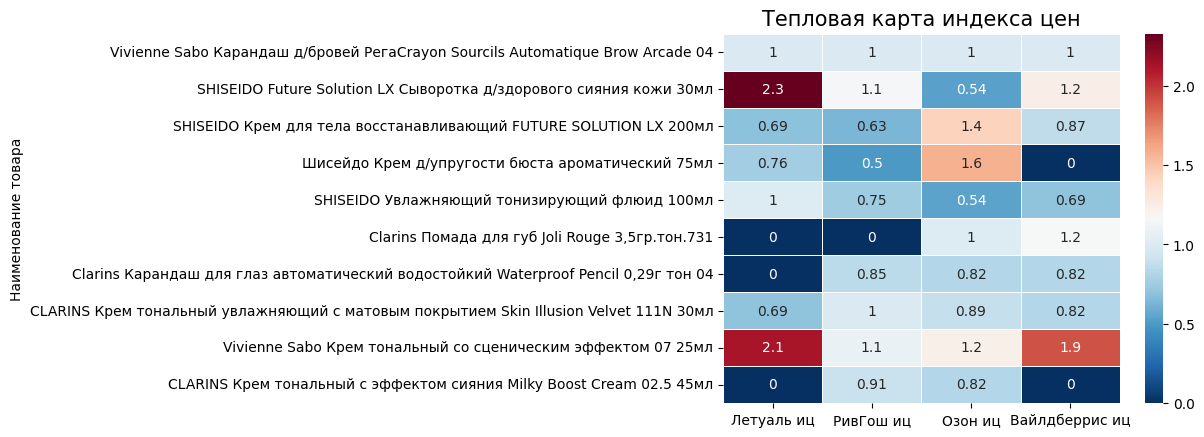

In [31]:
df = pd.DataFrame(df_price_all,columns=['Летуаль иц','РивГош иц','Озон иц','Вайлдберрис иц'])
df.index = df_price_all['Наименование товара']
sns.heatmap(df, linewidths=.5, cmap='RdBu_r', annot=True)
plt.title('Тепловая карта индекса цен', fontsize = 15);

Исходя из тепловой карты видим, например:

Vivienne Sabo Карандаш д/бровей 04 представлен по аналогичной цене у конкурентов. SHISEIDO Future Solution LX сыворотка на 54% дешевле в магазине Озон, у остальных конкурентов продукт представлен по большей цене (больше от 10-130%). Clarins Помада для губ Joli Rouge 3,5гр.тон.731 в магазинах Летуаль и РивГош не представлена, на Озон имеет аналогичную стоимость, на Вайлдберрис дороже на 20%.

Исходя из того, что **наша стратегия - встать в минимальную цену на рынке**, определим минимальную цену для каждого товара и оценим возможность установления соответствующей цены.

In [32]:
def min_pi(row):
    row_values = [value for value in row if value != 0 and value < 1 ]
    if row_values:
        return min(row_values)
    else:
        return 1 

min_pi = df.apply(min_pi, axis=1)
min_pi

Наименование товара
Vivienne Sabo Карандаш д/бровей РегаCrayon Sourcils Automatique Brow Arcade 04          1.00
SHISEIDO Future Solution LX Сыворотка д/здорового сияния кожи 30мл                      0.54
SHISEIDO Крем для тела восстанавливающий FUTURE SOLUTION LX 200мл                       0.63
Шисейдо Крем д/упругости бюста ароматический 75мл                                       0.50
SHISEIDO Увлажняющий тонизирующий флюид 100мл                                           0.54
Clarins Помада для губ Joli Rouge 3,5гр.тон.731                                         1.00
Clarins Карандаш для глаз автоматический водостойкий Waterproof Pencil 0,29г тон 04     0.82
CLARINS Крем тональный увлажняющий с матовым покрытием Skin Illusion Velvet 111N 30мл   0.69
Vivienne Sabo Крем тональный со сценическим эффектом 07 25мл                            1.00
CLARINS Крем тональный с эффектом сияния Milky Boost Cream 02.5 45мл                    0.82
dtype: float64

Выше представлен размер скидки для стратегии минимальной цены (1 соответствует товарам, для которых рекомендованная цена остается неизменной).


Рассчитаем цены под стратегию и сравним с закупочными ценами.


добавить фактичексе цены и рекомендованные с учетом стратегии

добавить отпускную цену и вывести наценку по брендам 
Выведем минимальные индексы цен среди конкурентов для дальнейшей оценки стратегии:

In [33]:
df_price_all['Рекомендованная цена']= df_price_all['Цена Золотое яблоко 24.03'] * min_pi.values
recommended_price = df_price_all[['Код товара', 'Наименование товара','Цена закупки товара',\
                                  'Рекомендованная цена', 'Цена Золотое яблоко 24.03']]
recommended_price

,Код товара,Наименование товара,Цена закупки товара,Рекомендованная цена,Цена Золотое яблоко 24.03
0,3226300004,Vivienne Sabo Карандаш д/бровей РегаCrayon Sou...,180.53,328.00,329
1,15111300017,SHISEIDO Future Solution LX Сыворотка д/здоров...,14919.36,11668.00,21775
2,15111300006,SHISEIDO Крем для тела восстанавливающий FUTUR...,6197.27,9999.00,15795
3,15110900016,Шисейдо Крем д/упругости бюста ароматический 75мл,1019.62,2299.00,4600
4,19760336592,SHISEIDO Увлажняющий тонизирующий флюид 100мл,1759.72,3256.00,5980
5,14011400047,"Clarins Помада для губ Joli Rouge 3,5гр.тон.731",958.78,3200.00,3200
6,14012900005,Clarins Карандаш для глаз автоматический водос...,719.08,1937.00,2350
7,19000013047,CLARINS Крем тональный увлажняющий с матовым п...,1558.01,3599.00,5200
8,3234800007,Vivienne Sabo Крем тональный со сценическим эф...,265.40,367.00,367
9,19000000363,CLARINS Крем тональный с эффектом сияния Milky...,1288.36,3504.00,4250


Для Сыворотки `SHISEIDO Future Solution LX` рекомендованная цена оказалось ниже закупочной. Товар меньшей стоимости представлен на Вайлдберрис, в остальных магазинах цена выше, чем в Золотом Яблоке. Вероятно, низкая цена товара на Вайлдберрис может быть связана с его подлинностью. 
Поэтому для сыворотки `SHISEIDO Future Solution LX оставляем текущую цену`.

In [34]:
recommended_price.iat[1, 3] = 21775
recommended_price

,Код товара,Наименование товара,Цена закупки товара,Рекомендованная цена,Цена Золотое яблоко 24.03
0,3226300004,Vivienne Sabo Карандаш д/бровей РегаCrayon Sou...,180.53,328.00,329
1,15111300017,SHISEIDO Future Solution LX Сыворотка д/здоров...,14919.36,21775.00,21775
2,15111300006,SHISEIDO Крем для тела восстанавливающий FUTUR...,6197.27,9999.00,15795
3,15110900016,Шисейдо Крем д/упругости бюста ароматический 75мл,1019.62,2299.00,4600
4,19760336592,SHISEIDO Увлажняющий тонизирующий флюид 100мл,1759.72,3256.00,5980
5,14011400047,"Clarins Помада для губ Joli Rouge 3,5гр.тон.731",958.78,3200.00,3200
6,14012900005,Clarins Карандаш для глаз автоматический водос...,719.08,1937.00,2350
7,19000013047,CLARINS Крем тональный увлажняющий с матовым п...,1558.01,3599.00,5200
8,3234800007,Vivienne Sabo Крем тональный со сценическим эф...,265.40,367.00,367
9,19000000363,CLARINS Крем тональный с эффектом сияния Milky...,1288.36,3504.00,4250


In [35]:
markup_to_min_price = recommended_price['Цена Золотое яблоко 24.03'] - recommended_price['Рекомендованная цена']
markup_to_min_price.index = recommended_price['Наименование товара']
markup_to_min_price

Наименование товара
Vivienne Sabo Карандаш д/бровей РегаCrayon Sourcils Automatique Brow Arcade 04             1.00
SHISEIDO Future Solution LX Сыворотка д/здорового сияния кожи 30мл                         0.00
SHISEIDO Крем для тела восстанавливающий FUTURE SOLUTION LX 200мл                       5796.00
Шисейдо Крем д/упругости бюста ароматический 75мл                                       2301.00
SHISEIDO Увлажняющий тонизирующий флюид 100мл                                           2724.00
Clarins Помада для губ Joli Rouge 3,5гр.тон.731                                            0.00
Clarins Карандаш для глаз автоматический водостойкий Waterproof Pencil 0,29г тон 04      413.00
CLARINS Крем тональный увлажняющий с матовым покрытием Skin Illusion Velvet 111N 30мл   1601.00
Vivienne Sabo Крем тональный со сценическим эффектом 07 25мл                               0.00
CLARINS Крем тональный с эффектом сияния Milky Boost Cream 02.5 45мл                     746.00
dtype: float64

**С учетом выбранной стратегии предложение снизить наценку для товаров на значения, представленные выше(в рублях). Для достижения уровня рекомендованной цены.**

**При указанных значениях мы займем минимальную цену на рынке среди конкурентов (Летуаль, РивГош, Озон, Вайлдберрис)**

`* Необходим дополнительный анализ с оценкой маржинальности для каждого бренда с учетом рекомендованной цены`


### Исследуем исторические данные по интересующим нас брендам

In [36]:
df_t12 = pd.read_excel('/Users/andrey/Desktop/Kate/jup/notebook_project/GA_Zelenina_test/task_1.2.xlsx')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
df_t12.head(3)

,Дата,Код товара,Количество продано,Розничная цена,Цена с учётом скидки
0,2021-06-01,3226300004,9,271,271.00
1,2021-06-02,3226300004,15,271,271.00
2,2021-06-03,3226300004,12,271,216.80


In [37]:
df_t12['Скидка'] = 1 -(df_t12['Цена с учётом скидки']/df_t12['Розничная цена'])
df_t12.head(6)

,Дата,Код товара,Количество продано,Розничная цена,Цена с учётом скидки,Скидка
0,2021-06-01,3226300004,9,271,271.00,0.00
1,2021-06-02,3226300004,15,271,271.00,0.00
2,2021-06-03,3226300004,12,271,216.80,0.20
3,2021-06-04,3226300004,17,271,216.80,0.20
4,2021-06-05,3226300004,13,271,216.80,0.20
5,2021-06-06,3226300004,18,271,216.80,0.20


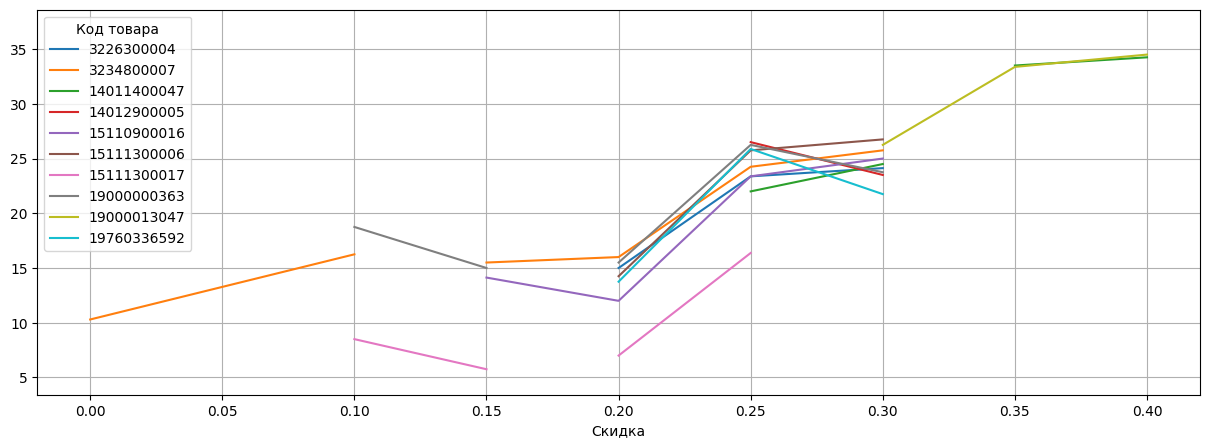

In [38]:
#Построим график зависимости продаж от скидки
df_t12.pivot_table(
    index='Скидка',
    columns='Код товара',  
    values='Количество продано',    
).plot(figsize=(15, 5), grid=True)

plt.show()

Максимальная скидка за исследуемый период составляла 40%.

При этом, динамика продаж при скидке на уровне 20-25% положительная для всех товаров, к которым применялась такая скидка. Продажи при этом увеличивваются почти в 2 раза. 
C ростом скидки с 10 до 15% продажи снижаются. Возможно, это связано с сезонностью, изменениями конкурентного рынка или другими показателями.

Интересно отметить, что сточки зрения увеличения продаж, самый привлекательный диапазон скидок 20-25% для всех товаров, на остальных участках продажи растут не так активно или снижаются.

Мы предполагаем, что скидка в объеме 20-25% будет положительно влиять на количество продаж (~ в 2 раза), однако, доступных нам данных недостаточно для заключения.

`Для точного результата необходимо построение модели ценовой эластичности с помощью методов машинного обучения.` Модель позволяет найти оптимальное соотношение цены (в том числе необходмый %скидки) и количества продаж, позволяющее увеличить прибыль. Кроме того, при моделировании, стоит учесть и другие факторы, например: влияние конкурентов, маркетинговую активность, сезонность(например средства защиты от солнца) и др. 

<a id='2'></a>
## Задача 2
- Проанализировать продажи в разрезе брендов за прошлую и позапрошлую недели, написать короткую аналитическую записику об изменениях и их причинах по выручке и маржинальности.
- Как изменилась маржинальность продаж в целом и какие основные факторы на это повлияли, какое действие может дать "быстрый" результат?

In [39]:
import pandas as pd
import numpy as np
import pylab as pl
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [40]:
df_t2 = pd.read_excel('/Users/andrey/Desktop/Kate/jup/notebook_project/GA_Zelenina_test/task_two.xlsx')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
df_t2.head(5)

,Бренд AX 1,Неделя,Выручка,Маржинальность
0,Shiseido,14,1353685520.77,0.17
1,Clarins,14,1329934371.92,0.09
2,Shiseido,15,1267702457.57,0.17
3,Clarins,15,974711947.75,0.15
4,Clinique,15,498201172.67,0.14


In [41]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Бренд AX 1      104 non-null    object 
 1   Неделя          104 non-null    int64  
 2   Выручка         104 non-null    float64
 3   Маржинальность  104 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ KB


In [42]:
df_t2['Маржа'] = df_t2['Выручка']*df_t2['Маржинальность']
df_t2.head()

,Бренд AX 1,Неделя,Выручка,Маржинальность,Маржа
0,Shiseido,14,1353685520.77,0.17,227180372.47
1,Clarins,14,1329934371.92,0.09,121486276.26
2,Shiseido,15,1267702457.57,0.17,214510287.57
3,Clarins,15,974711947.75,0.15,142214038.38
4,Clinique,15,498201172.67,0.14,69815982.71


In [43]:
# Создадим датафреймы за 14 и 15 недели
df_week_14 = df_t2[df_t2['Неделя'] == 14]
df_week_15 = df_t2[df_t2['Неделя'] == 15]

In [44]:
#определим вклад каджого бренда в недельную выручку за 14 неделю
fig = px.pie(df_week_14, values='Выручка', names='Бренд AX 1', title='Доля выручки по брендам за 14 неделю')  
fig.update_traces(textposition='inside', textfont_size=12) 
fig.update_layout(legend=dict(orientation="h", y=1.0, x=1.4)) 
fig.show()

In [45]:
#определим вклад каджого бренда в недельную выручку за 15 неделю
fig = px.pie(df_week_15, values='Выручка', names='Бренд AX 1', title='Доля выручки по брендам за 15 неделю')  
fig.update_traces(textposition='inside', textfont_size=12) 
fig.update_layout(legend=dict(orientation="h", y=1.0, x=1.4)) 
fig.show()

**ВЫРУЧКА**
* `Неделя 14`

`Shiseido`(16%) и `Clarins`(15.7%) формируют более 30% выручки

далее по вкладу в выручку следуют `Сlinique` (5.7%), `Estee Lauder` (3.9%), `BABOR` (3.7%)

* `Неделя 15`

Доля `Shiseido`(15.4%) и **`Clarins`(11.9%)**, **`Сlinique` (6,1%)**, **`Payot`(4,5%)** против 3,1% за 14 неделю, `Estee Lauder` (3,9%), `BABOR` (3,5%)


Изучим, как менялась маржа и маржинальность:

In [46]:
#определим вклад каджого бренда в недельную прибыль за 14 неделю
fig = px.pie(df_week_14, values='Маржа', names='Бренд AX 1', title='Маржа по брендам за 14 неделю')  
fig.update_traces(textposition='inside', textfont_size=12) 
fig.update_layout(legend=dict(orientation="h", y=1.0, x=1.4)) 
fig.show()

In [47]:
#определим вклад каджого бренда в недельную прибыль за 15 неделю
fig = px.pie(df_week_15, values='Маржа', names='Бренд AX 1', title='Маржа по брендам за 15 неделю')  
fig.update_traces(textposition='inside', textfont_size=12) 
fig.update_layout(legend=dict(orientation="h", y=1.0, x=1.4)) 
fig.show()

**МАРЖА**
* `Неделя 14`

`Shiseido`(18.4%), `Clarins`(9.81%), `Сlinique` (6.7%) формируют более 30% маржи 

далее по вкладу в выручку следуют `Payot` (5.6%), `Sisley` (3.8%), `BABOR` (3.7%)

* `Неделя 15`

Лидеры по объему маржи: `Shiseido`(16.9%), **`Clarins`(11.2%)**,`Payot` (6.1%).
`Сlinique` (5,5%), `La Mer`(3,7%), `Valmount` (3,9%), `BABOR` (3,4%)




Определим как изменилась маржинальность 15 недели относительно 14 недели:

In [48]:
df_merge = df_week_14.merge(df_week_15, on='Бренд AX 1', suffixes=('_14', '_15'))
df_merge['Дельта_маржинальности'] = round(df_merge['Маржинальность_15'] - df_merge['Маржинальность_14'], 2)

fig = px.bar(df_merge, x='Бренд AX 1', y='Дельта_маржинальности', title='Изменение маржинальности с 14 к 15 неделе')
fig.show()

**МАРЖИНАЛЬНОСТЬ динамика**

Максимальное изменение маржинальности наблюдается для брендов `Clatins`(выросла на 5%) и `Helena rubinstein` ( маржинальность снизилась на 5%). Для брендов`Payot`с 14 до 15 недели наблюдаем снижение маржинальности на 1%, `Clinique` -3%, `Sisley``Valmont` +1%.

In [49]:
fig = px.bar(df_merge, x='Бренд AX 1', y='Маржинальность_14', title='Маржинальность по брендам за недели 14 и 15')
fig.add_trace(px.bar(df_merge, x='Бренд AX 1', y='Маржинальность_15', opacity=0.3).data[0])

**МАРЖИНАЛЬНОСТЬ**

Маржинальность представленых брендов в пределах от 8 до 30%. 
У брендов, лидирующих по выручке и марже, маржинальность порядка: 
`Shiseido` 17%,  `Clarins` 9-15%, `Сlinique` 17-14%, `Estee Lauder` 10%, `BABOR` 15%, `Payot` 22-21% 

In [50]:
revenue_14 = df_week_14['Выручка'].sum()
margin_14 = df_week_14['Маржа'].sum()
marginality_14 = (margin_14/revenue_14)*100

revenue_15 = df_week_15['Выручка'].sum()
margin_15 = df_week_15['Маржа'].sum()
marginality_15 = (margin_15/revenue_15)*100

print('Общая маржинальность за 14 неделю составляет', round(marginality_14, 2), '%')
print('Общая маржинальность за 15 неделю составляет', round(marginality_15, 2), '%')

print('Выручка за 14 неделю больше на ', round(revenue_14-revenue_15, 2), \
      'р. что соответсвует', round(100*(revenue_14-revenue_15)/revenue_14, 2) ,'%')
print('Маржа за 15 неделю больше на ', round(margin_15-margin_14, 2), \
      'р. что соответсвует', round(100*(margin_15-margin_14)/margin_15, 2) ,'%')

Общая маржинальность за 14 неделю составляет 14.63 %
Общая маржинальность за 15 неделю составляет 15.45 %
Выручка за 14 неделю больше на  256281073.49 р. что соответсвует 3.03 %
Маржа за 15 неделю больше на  30198600.7 р. что соответсвует 2.38 %


### **ВЫВОД:**

***Проанализировать продажи в разрезе брендов за прошлую и позапрошлую недели, написать короткую аналитическую записику об изменениях и их причинах по выручке и маржинальности.***

* Бренды `Shiseido, Clarins и Clinique` играют ключевую роль в формировании выручки и маржи. Их доля в общем объеме превышает `30% как по выручке, так и по марже`, что свидетельствует об их важном вкладе в финансовые результаты. Также бренды `Estee Lauder, BABOR и Payot` вносят существенный вклад в выручку и маржу компании. 

Рассмотрим детальнее:

* Для бренда `Shiseido` выручка и маржа к 15 неделе снизились, маржинальность на прежнем уровне.
* `Сlinique` снизились и выручка, и маржа, и маржинальность.

* `Clarins` снижение выручки на 3,8%,при этом увеличение маржи на 1,4%, что связано с 5% ростом маржинальности для бренда. 
* Для `Payot` наблюдаем повышение маржи при снижении маржинальности, что свидетельствует о возросших издержках, возможно произошло изменение закупочной цены, возможно снижение маржинальности произошло в связи с изменением стратегии ценообразования или изменением уровня конкуренции. Отметим, что для `Payot` маржинальность выше среднего среди брендов-лидеров.



* Изменения в доле выручки и маржинальности брендов свидетельствуют о динамике их конкурентной позиции на рынке. Эти данные могут быть полезны для стратегического планирования и управления портфелем брендов компании.



***Как изменилась маржинальность продаж в целом и какие основные факторы на это повлияли, какое действие может дать "быстрый" результат?***

* Повышение общей маржинальности (~1%) говорит о том, что издержки уменьшаются относительно выручки, что является положительным сигналом для бизнеса. Повышение маржинальности произошло в ответ на увеличение маржи.

* Первично размер маржинальности зависит от себестоимости производства. Также влияние оказывают следующие факторы: `спрос`, `конкуренция`, платежеспособность аудитории, внешние факторы.

* В свою очередь, мы можем повлиять на маржинальность через спрос и конкуренцию: изучить цены на те же продукты у конкурентов и `оценить необходимость корректировки цен, их увеличения или введения дополнительных скидок`.



* Для достижения "быстрого" результата в прибыли в первую очередь стоит обратить внимание на высокодоходные бренды с высокой маржинальностью (В нашем случае лидерами являются: Shiseido, Clarins, Clinique, Estee Lauder, BABOR, Payot). Изучить цены на аналогичные продукты у конкурентов и скорректировать собственные цены: повысить цены на низкомаржинальные товары и снизить на высокомаржинальные товары. Т.е. для увеличения прибыли в кратчайшие сроки эффективно увеличение общей маржинальности за счет оптимизации ценовой стратегии.


* Для более отсроченного результата - детальнее изучить бренды, приносящие меньшую выручку и маржу. Определить, в чем могут быть наши преимущества, пересмотреть стратегию ценообразования, выяснить, представлены ли бренды у конкурентов, есть ли в наличии, доступна ли доставка или продукт можно купить только офлайн, если товар недоступен, оценить - на протяжении какого времени и т.д. 


<a id='3'></a>
## Задача 3

In [51]:
import pandas as pd
import sqlite3

In [52]:
con = sqlite3.connect("/Users/andrey/Desktop/Kate/jup/notebook_project/GA_Zelenina_test/ga.sqlite")
df = pd.read_sql_query("PRAGMA table_info('flatproducts')", con)
df

,cid,name,type,notnull,dflt_value,pk
0,0,itemid,TEXT,0,None,0
1,1,name_ax,TEXT,0,None,0
2,2,brand_name_ax,TEXT,0,None,0
3,3,category,TEXT,0,None,0


Для проверки корректности запросов была создана БД с примерами таблиц

### 3.1. Рассчитать `сумму остатков в разрезе категорий товара на 12.12.2021` только для закупаемых товаров (`MTS`).


In [53]:
query = ''' 
SELECT p.category AS "категория товара",
    SUM(f.balance) AS "сумма остатков на 12.12.2021 для MTS"
FROM cloud_facts AS f
JOIN cloud_skulist AS s ON s.itemid=f.itemid
JOIN flatproducts AS p ON p.itemid=f.itemid
WHERE f.date = '2021-12-12' AND s.state = 'MTS'
GROUP BY p.category
'''

df = pd.read_sql_query(query, con)
df

,категория товара,сумма остатков на 12.12.2021 для MTS
0,Декоративная косметика,19
1,Уходовая косметика,19


### 3.2. Рассчитать `по дням` сколько товаров доступно к заказу (`MTS`) и какой `средний остаток` по ним на каждый день.


In [54]:
query = ''' 

SELECT  s.date AS "дата", 
    COUNT(s.itemid) AS "товаров доступно к заказу", 
    ROUND(AVG(f.balance), 2) AS "средний остаток в день"
FROM cloud_skulist AS s
JOIN cloud_facts AS f ON s.itemid=f.itemid
WHERE  s.state = 'MTS'
GROUP BY s.date 

'''
df = pd.read_sql_query(query, con)
df

,дата,товаров доступно к заказу,средний остаток в день
0,2021-12-12,5,6.80
1,2021-12-13,12,4.50
2,2021-12-14,8,10.25


### 3.3. Рассчитать таблицу:  `код товара`, `наименование товара`, `категорию товара`, `первая дата появления остатка`, `количество остатков на 31.12.2021`, `средний остаток для sku по категории товара`.


In [55]:
query = '''
WITH balance_to_date AS (
        SELECT balance, itemid FROM cloud_facts where date = DATE('2021-12-31')
                        )

SELECT 
    f_p.itemid AS "код товара",
    f_p.name_ax AS "наименование товара", 
    f_p.category AS "категорию товара", 
    IIF(c_f.balance > 0, MIN(c_f.date), 0) AS "первая дата появления остатка", 
    IIF(b_f.balance >= 0, b_f.balance, 0) AS "количество остатков на 31.12.2021",
ROUND(AVG(c_f.balance)) "средний остаток для sku"
FROM flatproducts as f_p
JOIN cloud_facts as c_f ON c_f.itemid = f_p.itemid
LEFT JOIN balance_to_date as b_f ON b_f.itemid = f_p.itemid
GROUP BY c_f.itemid, f_p.name_ax, f_p.category
'''
df = pd.read_sql_query(query, con)
df

,код товара,наименование товара,категорию товара,первая дата появления остатка,количество остатков на 31.12.2021,средний остаток для sku
0,14011400047,Clarins Помада,Декоративная косметика,2021-12-14,0,8.00
1,14012900005,Clarins Карандаш для глаз,Декоративная косметика,2021-12-12,0,19.00
2,15110900016,SHISEIDO Крем д/упругости,Уходовая косметика,2021-12-13,0,5.00
3,15111300006,SHISEIDO Крем,Уходовая косметика,2021-12-12,0,5.00
4,15111300017,SHISEIDO Future Solution LX,Уходовая косметика,2021-12-12,0,3.00
5,19000013047,CLARINS Крем тональный,Декоративная косметика,2021-12-13,0,12.00
6,19760336592,SHISEIDO флюид,Уходовая косметика,0,0,2.00
7,3226300004,Vivienne Sabo Карандаш,Декоративная косметика,0,0,6.00
8,3234800007,Vivienne Sabo Крем тональный,Уходовая косметика,2021-12-14,15,24.00


<a id='4'></a>
## Задача 4
### Рассчитать `WAU` скользящим окном в неделю с шагом в 1 день, при этом текущая дата должна включаться в расчет.
`WAU` - кол-во активных пользователей сайта.

*Например, для даты 19.12.2023 нужно рассчитать WAU за период 13.12.2023-19.12.2023,
для  20.12.2023  - 14.12.2023-20.12.2023
для  21.12.2023  - 15.12.2023-21.12.2023
и т.д.

*В связи с ограниченным функционалом оконных функций в Sqllite (невозможность работы с диапазонами дат), решение представлено на диалекте PostgeSQL.